In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel("/content/sample_data/heart_disease.xlsx", sheet_name="Heart_disease")

print("Column Names:\n", df.columns)

target_col = 'num'
if target_col not in df.columns:
    raise KeyError(f"Dataset does not contain a '{target_col}' column. Please verify column names.")

print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:\n", df.head())

print("\nMissing Values:\n", df.isnull().sum())

# Convert boolean columns to integers
df = df.map(lambda x: int(x) if isinstance(x, bool) else x)

Column Names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB

First 5 Rows:
    age   sex               cp  trestbps  cho

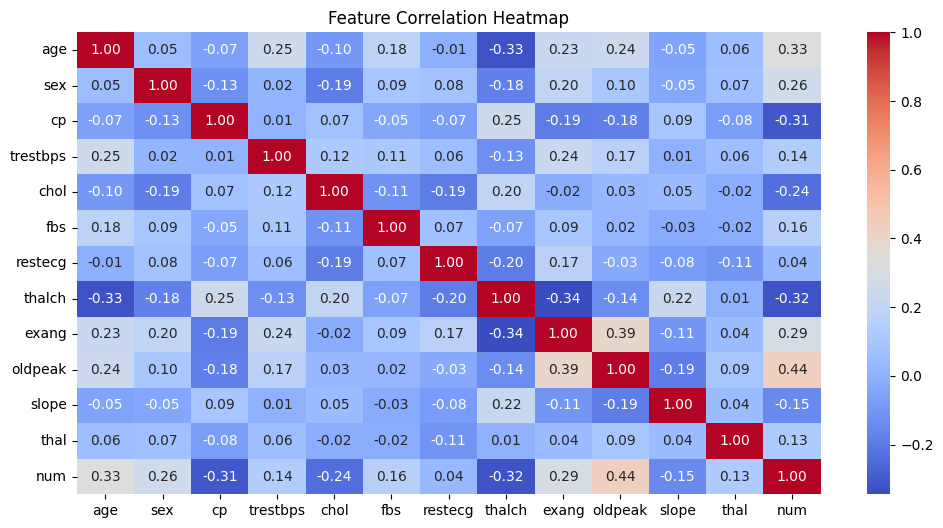

Accuracy: 0.4945054945054945
Precision: 0.5366014289753013
Recall: 0.4945054945054945
F1 Score: 0.5079253792246682
ROC AUC Score: 0.6543583810983475

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69        80
           1       0.50      0.36      0.42        53
           2       0.22      0.41      0.29        22
           3       0.25      0.29      0.27        21
           4       0.50      0.50      0.50         6

    accuracy                           0.49       182
   macro avg       0.44      0.44      0.43       182
weighted avg       0.54      0.49      0.51       182



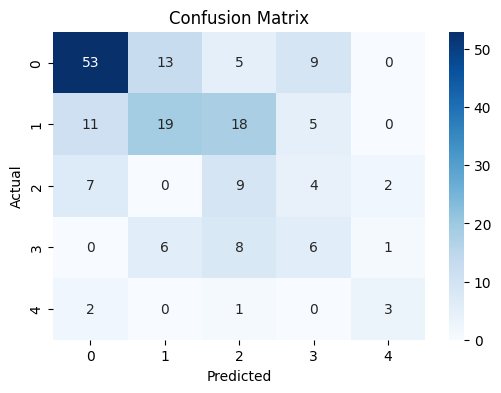

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.510989010989011
Precision: 0.5795839081553368
Recall: 0.510989010989011
F1 Score: 0.4670376964231712
ROC AUC Score: 0.7027072036388174

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75        80
           1       0.40      0.42      0.41        53
           2       0.14      0.18      0.16        22
           3       1.00      0.00      0.00        21
           4       1.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.64      0.29      0.26       182
weighted avg       0.58      0.51      0.47       182



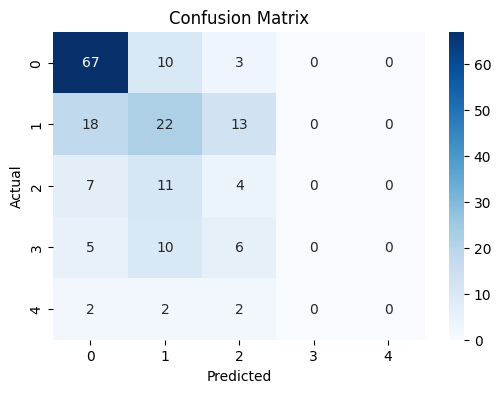


DECISION TREE:


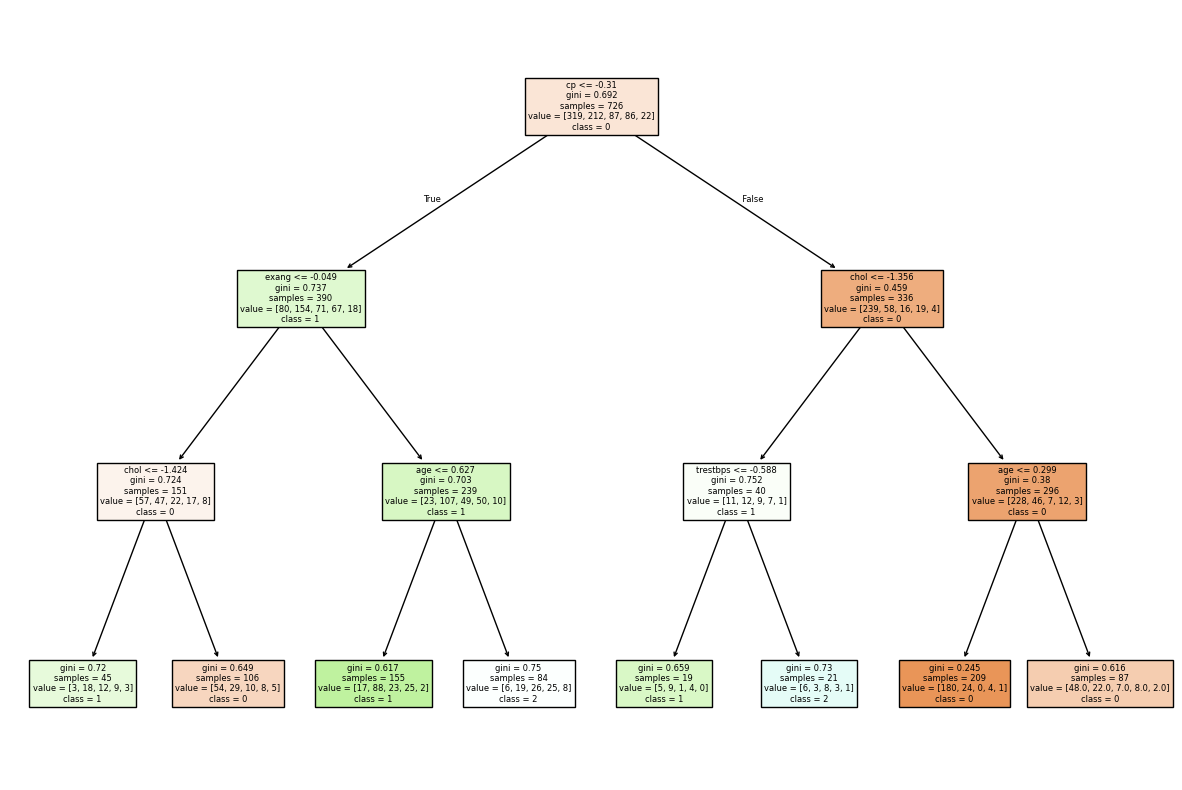

In [ ]:
#EDA
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Splitting into features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classification
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

def evaluate_model(y_true, y_pred, y_pred_proba):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=1))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=1))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=1))
    if len(np.unique(y_true)) > 2:
        print("ROC AUC Score:", roc_auc_score(y_true, y_pred_proba, multi_class='ovr'))
    else:
        print("ROC AUC Score:", roc_auc_score(y_true, y_pred_proba[:, 1]))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=1))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred, y_pred_proba)

# Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Train best model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
y_pred_best_proba = best_clf.predict_proba(X_test)
evaluate_model(y_test, y_pred_best, y_pred_best_proba)

# Decision Tree
print("\nDECISION TREE:")
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=[str(col) for col in df.drop(columns=[target_col]).columns], class_names=[str(i) for i in df[target_col].unique()], filled=True)
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

  Decision tree models have several key hyperparameters that impact performance. The criterion ('gini' or 'entropy') determines how nodes split, with Gini being faster and entropy sometimes yielding better results. Max depth limits tree size to prevent overfitting, while min_samples_split and min_samples_leaf control how many samples are needed for splitting and leaf nodes, reducing complexity. Max features restricts the number of features considered at each split, improving generalization, and max_leaf_nodes limits the number of terminal nodes.

2. What is the difference between the Label encoding and One-hot encoding?

  When encoding categorical data, label encoding assigns a unique numeric value to each category, making it suitable for ordinal data but potentially misleading for nominal variables due to the imposed order. One-hot encoding, on the other hand, creates separate binary columns for each category, ensuring no artificial ordering but increasing dimensionality. Label encoding is efficient but may introduce unintended relationships, whereas one-hot encoding is better for unordered categories but can lead to the curse of dimensionality in datasets with many unique values
